In [1]:
from torchvision import datasets
import torch
data_folder = '~/data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [2]:
# Fetch an image from the downloaded dataset
tr_images = fmnist.data
tr_targets = fmnist.targets

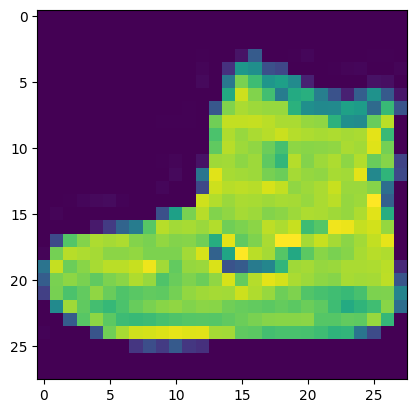

In [3]:
import matplotlib.pyplot as plt 
plt.imshow(tr_images[0])

#### Perform Scaling on top of the image

In [4]:
from imgaug import augmenters as iaa
import numpy as np
aug = iaa.Affine(scale=2)
img = np.array(tr_images[0])

Text(0.5, 1.0, 'Scaled Image')

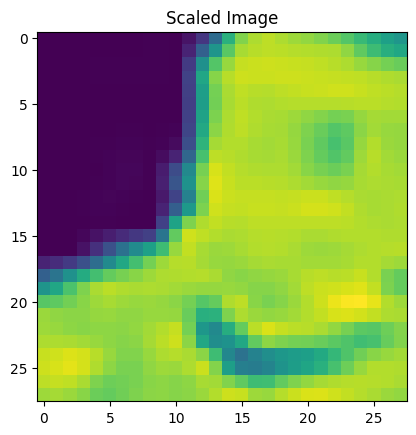

In [5]:
plt.imshow(aug.augment_image(img))
plt.title("Scaled Image")

The image has been zoomed into considerable. This has resulted in some pixels being chopped off from the original, though the shape remains the same.

it is important to note that first you have to convert the image to a numpy array before applying the augment function the image

#### Image Translation

Text(0.5, 1.0, 'Translated image by 10')

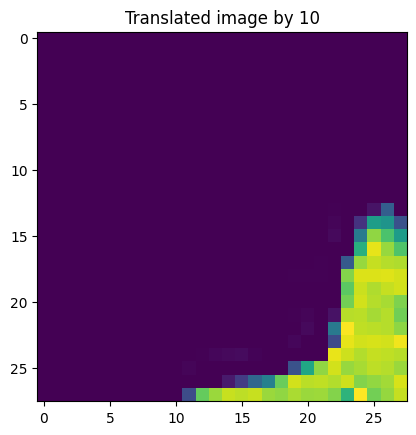

In [6]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(img))
plt.title("Translated image by 10")

The translation of the image done above resulted in translated it by 10 pixels in the x and y axes in the translate_px parameter

However, if we wanted to perform translation more in one axis and less in the other axis, we must specify the amount of translation we want in each axis.

This can be don with the use of a dictionary

Text(0.5, 1.0, 'Translated 10 pixels right and 2 pixels down')

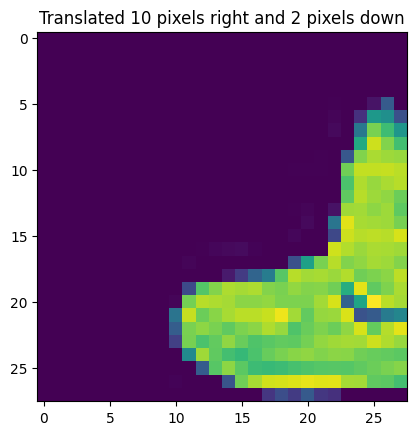

In [7]:
aug = iaa.Affine(translate_px={'x':10, "y":2})
plt.imshow(aug.augment_image(img))
plt.title("Translated 10 pixels right and 2 pixels down")

Note that so far in all our transformations we've done, the translations and the scaling, some part of our pixels of the images are chopped of. we would deal with this situation later.

The problem with this cropping that chops off some part of the images is that information is lost along the way.

But for now, let's see how rotation and shearing impacts on image augmentation

Text(0.5, 1.0, 'Scaled Image')

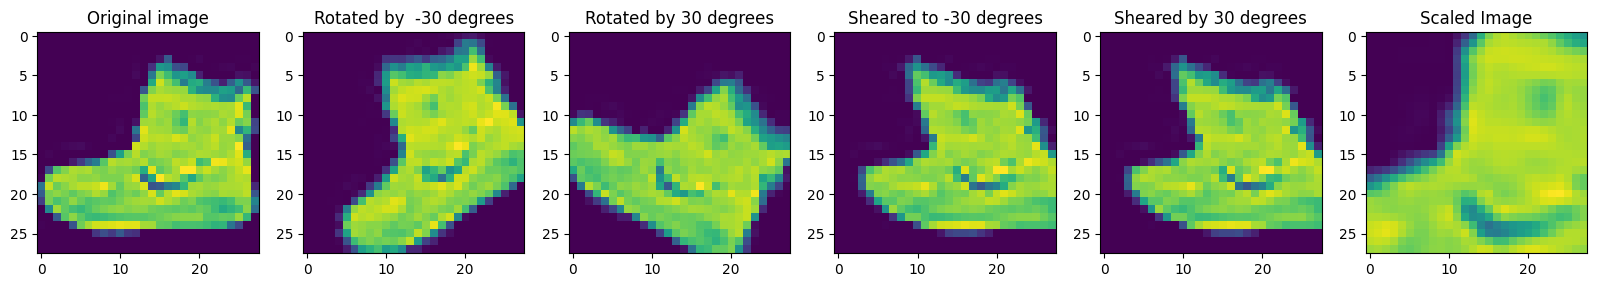

In [8]:
aug_rotate = iaa.Affine(rotate=-30)
aug_rotate_2 = iaa.Affine(rotate=30)
aug_shear = iaa.Affine(shear=-30)
aug_shear_2 = iaa.Affine(shear=30)
aug_scaled = iaa.Affine(scale=2)

plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0])
plt.title("Original image")

plt.subplot(162)
plt.imshow(aug_rotate.augment_image(img))
plt.title("Rotated by  -30 degrees")

plt.subplot(163)
plt.imshow(aug_rotate_2.augment_image(img))
plt.title("Rotated by 30 degrees")

plt.subplot(164)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared to -30 degrees")

plt.subplot(165)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared by 30 degrees")

plt.subplot(166)
plt.imshow(aug_scaled.augment_image(img))
plt.title("Scaled Image")

To fix the problem that arises in transformation that leads to loss of information due to cropping, we can pass in a parameter when creating the instance of the  object

Text(0.5, 1.0, 'Scaled Image')

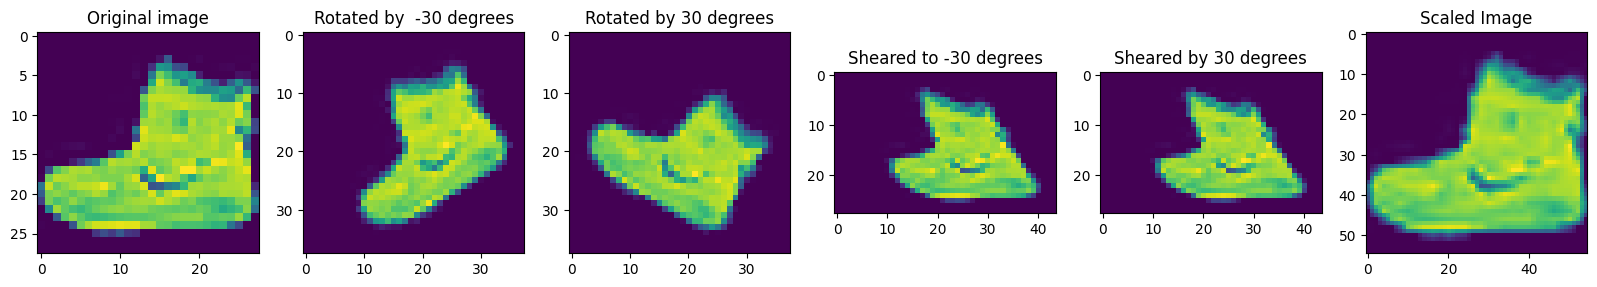

In [9]:
aug_rotate = iaa.Affine(rotate=-30, fit_output=True)
aug_rotate_2 = iaa.Affine(rotate=30, fit_output=True)
aug_shear = iaa.Affine(shear=-30, fit_output=True)
aug_shear_2 = iaa.Affine(shear=30, fit_output=True)
aug_scaled = iaa.Affine(scale=2, fit_output=True)

plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0])
plt.title("Original image")

plt.subplot(162)
plt.imshow(aug_rotate.augment_image(img))
plt.title("Rotated by  -30 degrees")

plt.subplot(163)
plt.imshow(aug_rotate_2.augment_image(img))
plt.title("Rotated by 30 degrees")

plt.subplot(164)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared to -30 degrees")

plt.subplot(165)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared by 30 degrees")

plt.subplot(166)
plt.imshow(aug_scaled.augment_image(img))
plt.title("Scaled Image")

In real practice, we would prefer to rotate our images over a range of values instead of fixed ones. we can do this in the next section.

Also it is important to note that the transformed images usually in the case of rotation and translation creates new pixel that are  filled with default values. 

If you want these new pixels to be filled with a special value, you can specify in the instantiation of the  object



Text(0.5, 1.0, 'Scaled Image')

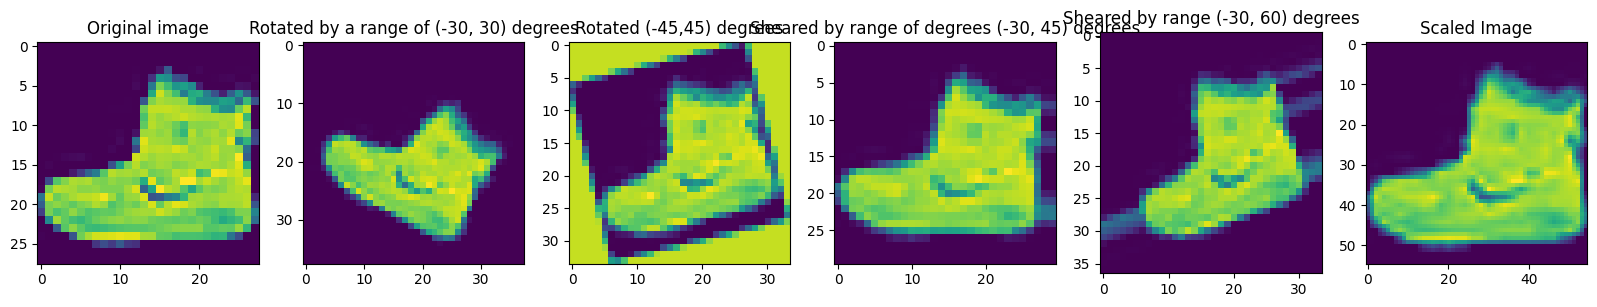

In [10]:
aug_rotate = iaa.Affine(rotate=(-30, 30), fit_output=True, cval=0, mode='constant')
aug_rotate_2 = iaa.Affine(rotate=(-45, 45), fit_output=True, cval=223, mode='constant')
aug_shear = iaa.Affine(shear=(-30, 45), fit_output=True, cval=0, mode='edge')
aug_shear_2 = iaa.Affine(shear=(-30, 60), fit_output=True, cval=0, mode='wrap')
aug_scaled = iaa.Affine(scale=2, fit_output=True)

plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0])
plt.title("Original image")

plt.subplot(162)
plt.imshow(aug_rotate.augment_image(img))
plt.title("Rotated by a range of (-30, 30) degrees")

plt.subplot(163)
plt.imshow(aug_rotate_2.augment_image(img))
plt.title("Rotated (-45,45) degrees")

plt.subplot(164)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared by range of degrees (-30, 45) degrees")

plt.subplot(165)
plt.imshow(aug_shear.augment_image(img))
plt.title("Sheared by range (-30, 60) degrees")

plt.subplot(166)
plt.imshow(aug_scaled.augment_image(img))
plt.title("Scaled Image")

#### Changing the Brightness of the image

The brightness present in the image can affect the quality of our predictions too. Let's say if the background is having a pixel value of 0 and the foreground that of 255.
If we train our model on this type and make predictions on this type, then we shouldn't have a problem with the accuracy.

But on the other hand, let's say if the  data we're trying to predict contains different variations of brightness, then it will definitely affect the accuracy of our predictions. Because the model didn't see those examples during it's training.


Multiply and Linearcontrast are two methods that can help with this type of augmentations.

The Multiply will multiply each pixel of the image by the specified value.

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

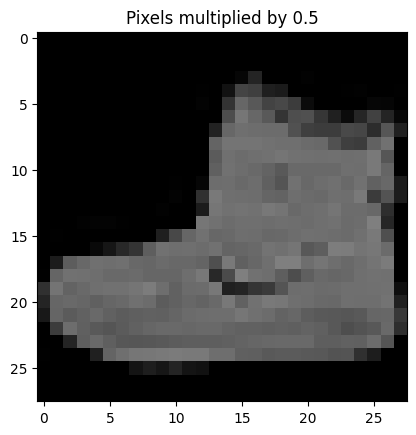

In [12]:
aug_mult = iaa.Multiply(0.5)
plt.imshow(aug_mult.augment_image(img), cmap='gray', vmin=0, vmax=255)
plt.title("Pixels multiplied by 0.5")

From the result above, the multiplication will reduce the brightness of the foreground while that of the background stayed the same in this case.

We can use the Linearconstrast to make changes that will affect both the background and the foreground

Text(0.5, 1.0, 'Pixels contrasted by 0.5')

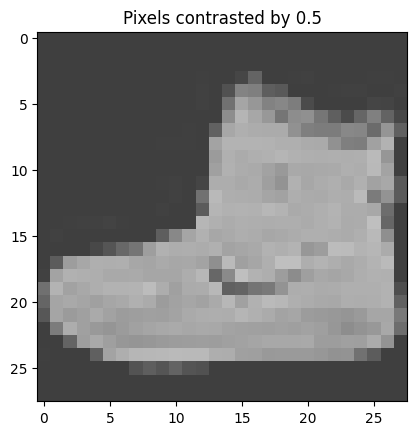

In [13]:
aug_lin_con = iaa.LinearContrast(0.5)
plt.imshow(aug_lin_con.augment_image(img), cmap='gray', vmin=0, vmax=255)
plt.title("Pixels contrasted by 0.5")

Here  we can see that the background brightness was increased while the foreground background was decreased

We can also apply blurring to the image can help in mimicking a realistic scenario. This blurring can be done using the gaussian blur class

Text(0.5, 1.0, 'Pixels Blurred')

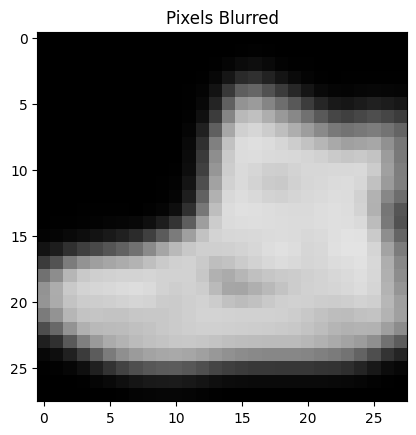

In [15]:
aug_blur  = iaa.GaussianBlur(sigma=1)
plt.imshow(aug_blur.augment_image(img), cmap='gray', vmin=0, vmax=255)
plt.title("Pixels Blurred")

####  Adding Noise 

Text(0.5, 1.0, 'Random 20% of salt and pepper added')

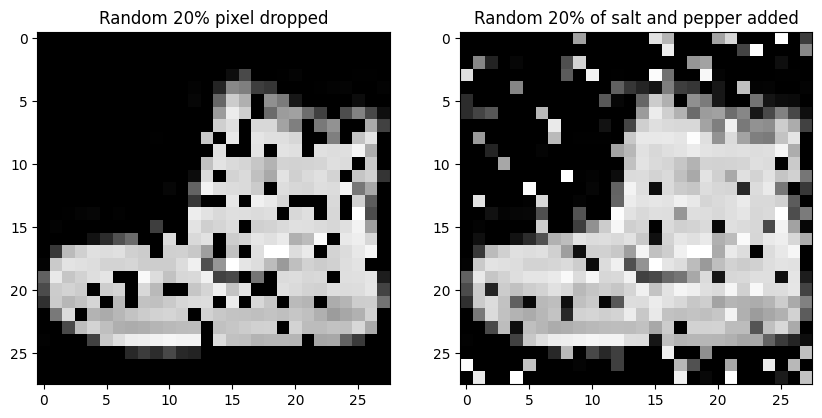

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(121)
aug_dropout = iaa.Dropout(p=0.2)
plt.imshow(aug_dropout.augment_image(img), cmap='gray', vmin=0, vmax=255)
plt.title("Random 20% pixel dropped")

plt.subplot(122)
aug_salt_pepper = iaa.SaltAndPepper(0.2)
plt.imshow(aug_salt_pepper.augment_image(img), cmap='gray', vmin=0, vmax=255)
plt.title("Random 20% of salt and pepper added")

What's the difference between the two methods?

In the dropout method, it simply replaced the white pixels with black pixel values.

In salt and pepper, it simply randomly added both white and black pixels to the images

#### Sequence of Augmentation

In [19]:
# dropout and rotation augmentation
seq = iaa.Sequential(
    [iaa.Dropout(p=0.2),
    iaa.Affine(rotate=(-45, 60))],
    random_order=True
)

Text(0.5, 1.0, 'Two augmentation applied in a random order')

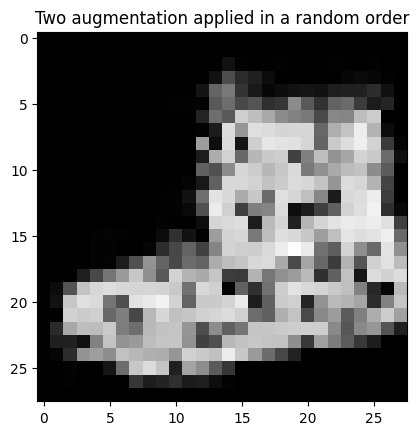

In [20]:
plt.imshow(seq.augment_image(img), cmap='gray', vmin=0, vmax=255)
plt.title("Two augmentation applied in a random order")

From the image above, we can see that we have performed two augmentation on the original image